# Predicting Student Performance

In [145]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [132]:
datam = pd.read_csv("student-mat.csv", sep=';', quotechar='"', quoting=1)
datam.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [134]:
datam.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [135]:
datam.shape

(395, 33)

In [73]:
datam.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7788\1316491988.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datam['absences'], shade=True)


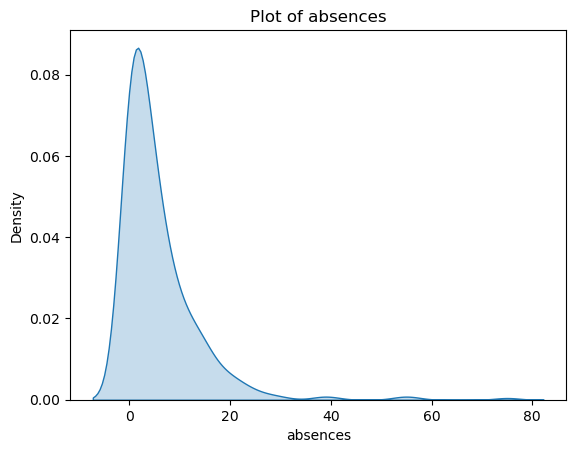

In [74]:
sns.kdeplot(datam['absences'], shade=True)
plt.xlabel('absences')
plt.ylabel('Density')
plt.title('Plot of absences')
plt.show()

In [133]:
#convert categorical feautures to numerical ones

label_encoder = LabelEncoder()
datam['school'] = label_encoder.fit_transform(datam['school'])
datam['sex'] = label_encoder.fit_transform(datam['sex'])
datam['address'] = label_encoder.fit_transform(datam['address'])
datam['famsize'] = label_encoder.fit_transform(datam['famsize'])
datam['Pstatus'] = label_encoder.fit_transform(datam['Pstatus'])
datam['schoolsup'] = label_encoder.fit_transform(datam['schoolsup'])
datam['famsup'] = label_encoder.fit_transform(datam['famsup'])
datam['paid'] = label_encoder.fit_transform(datam['paid'])
datam['activities'] = label_encoder.fit_transform(datam['activities'])
datam['higher'] = label_encoder.fit_transform(datam['higher'])
datam['internet'] = label_encoder.fit_transform(datam['internet'])
datam['romantic'] = label_encoder.fit_transform(datam['romantic'])
datam['famrel'] = label_encoder.fit_transform(datam['famrel'])

datam.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,...,3,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,at_home,other,...,4,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,at_home,other,...,3,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,health,services,...,2,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,other,other,...,3,3,2,1,2,5,4,6,10,10


In [138]:
#droping non-valuable feautures
columns_to_drop = ["Medu","Walc","Mjob","Fjob","guardian","reason","nursery"]
datam.drop(columns=columns_to_drop,inplace=True)


In [136]:
y = datam["G3"]

datam.drop(columns=["G3"],inplace=True)
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

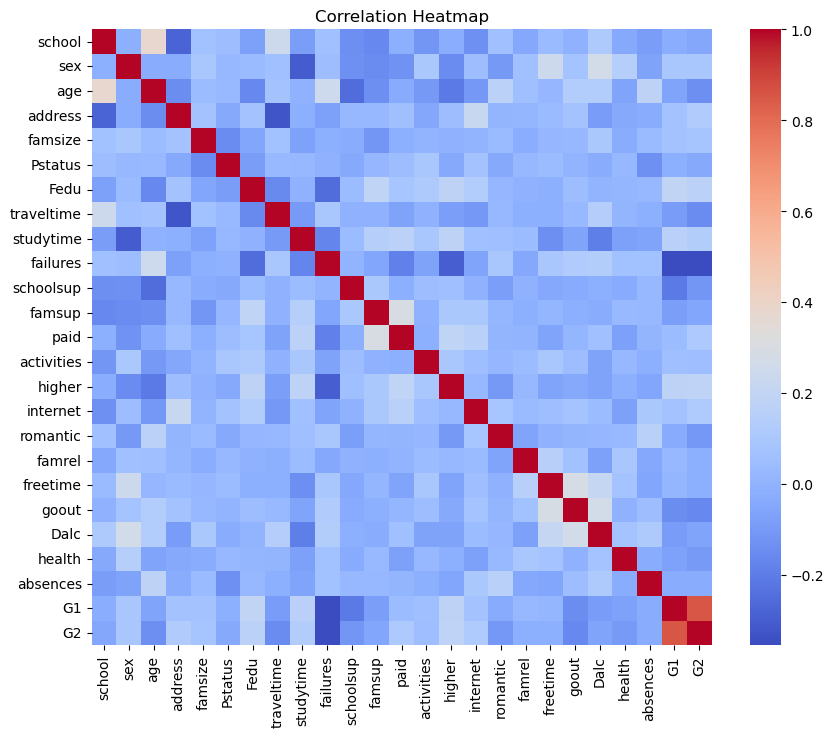

,school,sex,age,address,famsize,Pstatus,Fedu,traveltime,studytime,failures,...,internet,romantic,famrel,freetime,goout,Dalc,health,absences,G1,G2
0,0,0,18,1,0,0,4,2,2,0,...,0,0,3,3,4,1,3,6,5,6
1,0,0,17,1,0,1,1,1,2,0,...,1,0,4,3,3,1,3,4,5,5
2,0,0,15,1,1,1,1,1,2,3,...,1,0,3,3,2,2,3,10,7,8
3,0,0,15,1,0,1,2,1,3,0,...,1,1,2,2,2,1,5,2,15,14
4,0,0,16,1,0,1,3,1,2,0,...,0,0,3,3,2,1,5,4,6,10


In [139]:
# Compute correlation matrix
corr_matrix = datam.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
datam.head()

In [140]:
#splitting data
trainData = datam[:311]
trainTarget = np.array(y[:311]).reshape(311,1)
testData = datam[311:]
testTarget = np.array(y[311:]).reshape(84,1)


In [141]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(trainData,trainTarget)
model.score(trainData,trainTarget)

0.8698818143525979

In [142]:
pred = model.predict(testData)
pred = pred.reshape(84,1)
model.score(testData,testTarget)

0.7133533322649239

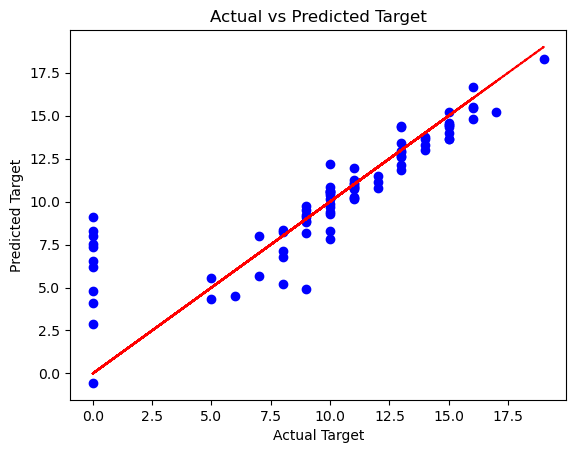

In [143]:
# Visualizing the prediction accuracy
plt.scatter(testTarget, pred, color='blue')
plt.plot(testTarget, testTarget, color='red', linestyle='--') 
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target')
plt.show()


In [144]:
mse = np.mean((pred-testTarget)**2)
mse

6.324101482377374